# Import libraries

In [19]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

# Define train query

In [20]:
train_query="SELECT"

# Import id->label

In [21]:
dict_label_ids = load_dict_label_ids('../data/train/ids_labels.json')

# Import vectors

In [22]:
path_df_train = '../data/train/TRAIN_filter_5_words_1000_offers.json'
path_new_model = '../model/my_model_V5.h5'
df_train = pd.read_json(path_df_train)
vectorized_dataframe = load_vectorized_dataframe('../data/train/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [23]:
vocabulary = load_vocabulary('../data/train/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [24]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create model

In [25]:
model = create_model(input_dimension, output_dimension)

# Train model

In [26]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=8, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

2023-09-04 14:32:32.420609: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 555814240 exceeds 10% of free system memory.


Epoch 1/10
3828/3828 [==============================] - 17s 4ms/step - loss: 2.8523 - accuracy: 0.4763 - val_loss: 2.1463 - val_accuracy: 0.5811
Epoch 2/10
3828/3828 [==============================] - 13s 3ms/step - loss: 1.6256 - accuracy: 0.6347 - val_loss: 1.8590 - val_accuracy: 0.6272
Epoch 3/10
3828/3828 [==============================] - 13s 3ms/step - loss: 1.2203 - accuracy: 0.6899 - val_loss: 1.8806 - val_accuracy: 0.6374
Epoch 4/10
3828/3828 [==============================] - 14s 4ms/step - loss: 0.9734 - accuracy: 0.7334 - val_loss: 1.9440 - val_accuracy: 0.6357
Epoch 5/10
3828/3828 [==============================] - 13s 3ms/step - loss: 0.7961 - accuracy: 0.7688 - val_loss: 2.1201 - val_accuracy: 0.6366
Epoch 6/10
3828/3828 [==============================] - 13s 3ms/step - loss: 0.6643 - accuracy: 0.7977 - val_loss: 2.2853 - val_accuracy: 0.6440
Epoch 7/10
3828/3828 [==============================] - 14s 4ms/step - loss: 0.5757 - accuracy: 0.8214 - val_loss: 2.4789 - val_ac

/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot history

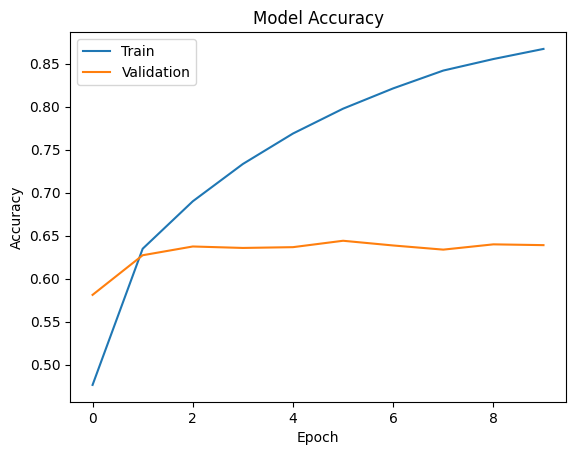

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()